In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits 

In [4]:
import glob
files = glob.glob('../data/hip67522/CHEOPS-products-*/Outdata/00000/hip67522_CHEOPS-products-*_im.fits')
files

['../data/hip67522/CHEOPS-products-20240319122713/Outdata/00000/hip67522_CHEOPS-products-20240319122713_im.fits',
 '../data/hip67522/CHEOPS-products-20240603073928/Outdata/00000/hip67522_CHEOPS-products-20240603073928_im.fits',
 '../data/hip67522/CHEOPS-products-20240522113135/Outdata/00000/hip67522_CHEOPS-products-20240522113135_im.fits',
 '../data/hip67522/CHEOPS-products-20240412070023/Outdata/00000/hip67522_CHEOPS-products-20240412070023_im.fits',
 '../data/hip67522/CHEOPS-products-20240311145359/Outdata/00000/hip67522_CHEOPS-products-20240311145359_im.fits',
 '../data/hip67522/CHEOPS-products-20240312075007/Outdata/00000/hip67522_CHEOPS-products-20240312075007_im.fits',
 '../data/hip67522/CHEOPS-products-20240529072301/Outdata/00000/hip67522_CHEOPS-products-20240529072301_im.fits',
 '../data/hip67522/CHEOPS-products-20240622064513/Outdata/00000/hip67522_CHEOPS-products-20240622064513_im.fits',
 '../data/hip67522/CHEOPS-products-20240325102059/Outdata/00000/hip67522_CHEOPS-products

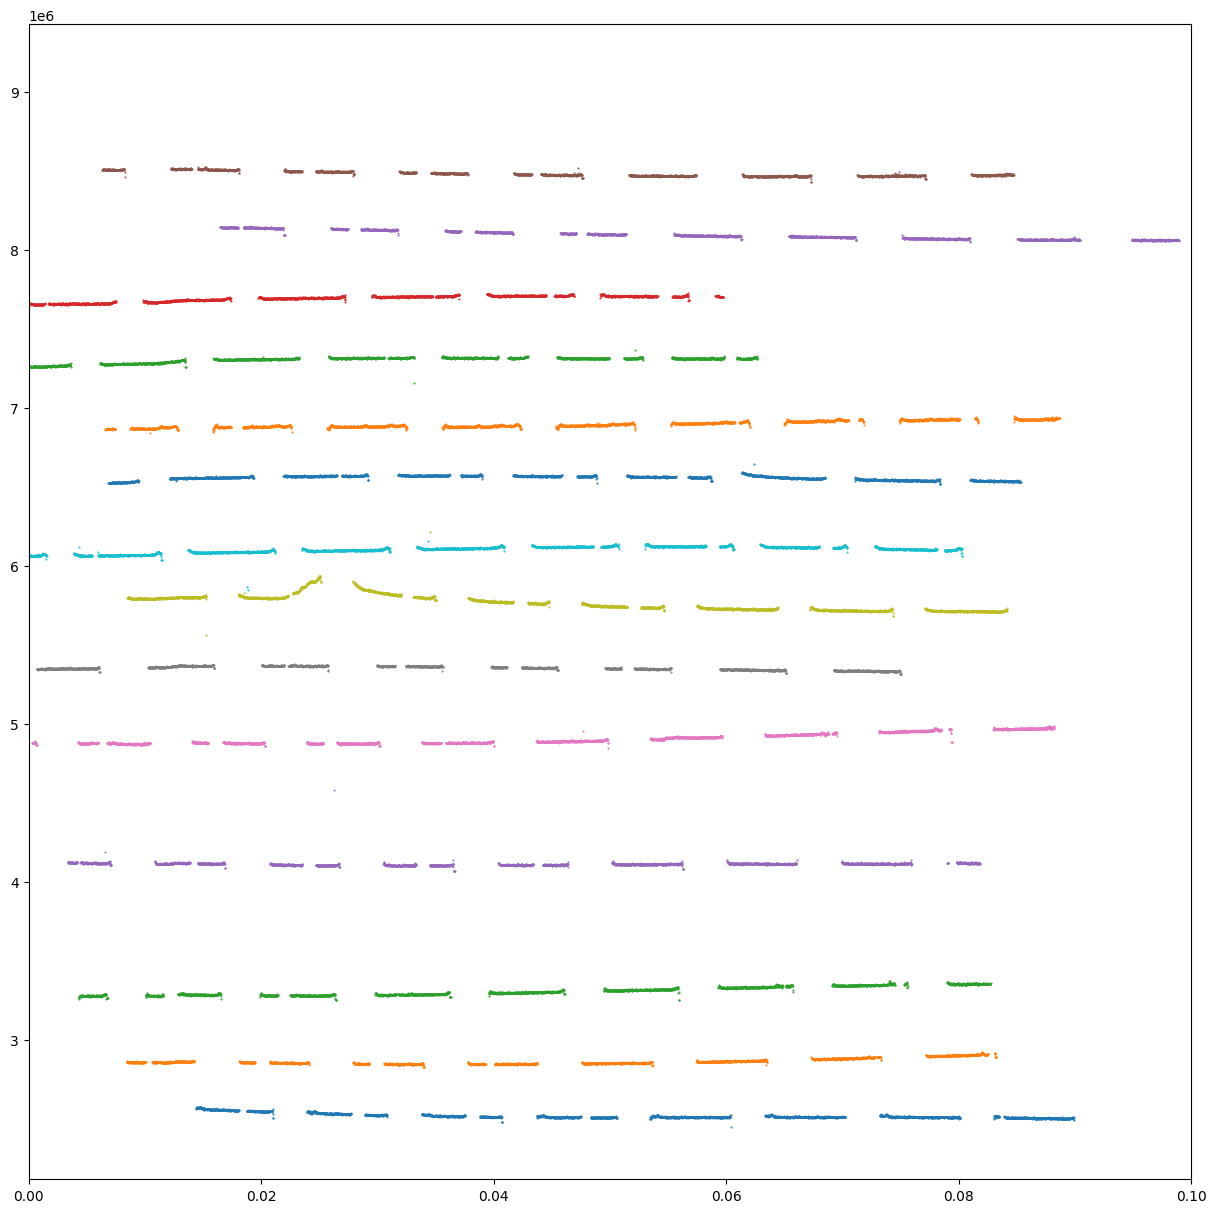

In [30]:
phases = np.array([])
midpoint = 2460392.61598
period = 6.9595
offs =0
plt.figure(figsize=(15,15))
for file in files:
    hdulist = fits.open(file)


    # get the image data
    image_data = hdulist[1].data

    t, f, ferr, roll = image_data["BJD_TIME"], image_data["FLUX"], image_data["FLUXERR"], image_data["ROLL"]

    # make sure the data is in fact 10s cadence
    assert np.diff(t).min() * 24 * 60 * 60 < 10.05, "Time series is not 10s cadence"

    # big endian to little endian
    t = t.byteswap().newbyteorder()
    f = f.byteswap().newbyteorder()
    ferr = ferr.byteswap().newbyteorder()
    roll = roll.byteswap().newbyteorder()



    # convert t to phase
    phase = (t - midpoint) / period % 1

    phases = np.concatenate([phases, phase])

    plt.plot(phase, f+offs, ".", markersize=1)
    offs += 400000
    plt.xlim(0,0.1)


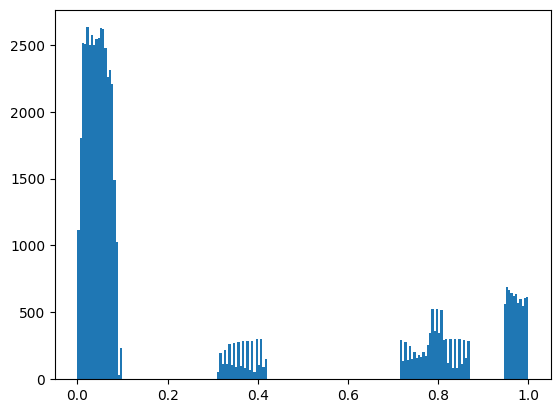

In [35]:
plt.hist(phases, bins=200);

In [43]:
# random draw three phases

binary = [0.02 < np.all(np.random.choice(phases, 20) < 0.07) for i in range(10000)]

binary = np.array(binary)
binary[binary==True].shape[0] / binary.shape[0]

0.0001